In [1]:
# Install extra libraries
!pip install nltk


# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import files
upload=files.upload()

Saving spam.csv to spam.csv


In [3]:
#Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
# Keep only required columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(df.head())
print("Shape:", df.shape)

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Shape: (5572, 2)


In [6]:
df.size

11144

In [7]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().values.any()

np.False_

In [9]:
df.isnull().sum()

,0
label,0
message,0


In [10]:
df.duplicated().sum()

np.int64(403)

In [ ]:
#Clean Dataset
df.drop_duplicates(inplace=True)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print(df['label'].value_counts())

label
0    4516
1     653
Name: count, dtype: int64


/tmp/ipython-input-4101502163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Blues')


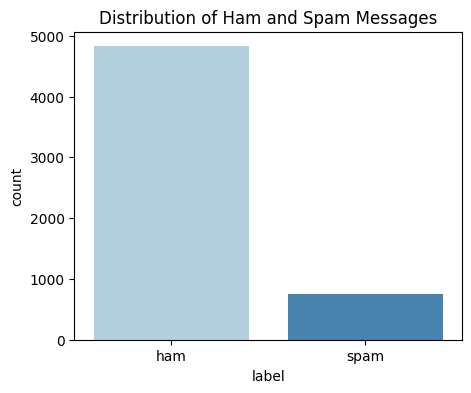

In [11]:
# Visualize class distribution
plt.figure(figsize=(5,4))
sns.countplot(x='label', data=df, palette='Blues')
plt.title("Distribution of Ham and Spam Messages")
plt.show()

In [15]:
# Split data
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
print("✅ Model trained successfully!")

✅ Model trained successfully!


In [19]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [20]:
# Evaluate model
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {acc:.4f}")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Ham','Spam']))



🎯 Accuracy: 0.9731

📋 Classification Report:
               precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       0.98      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



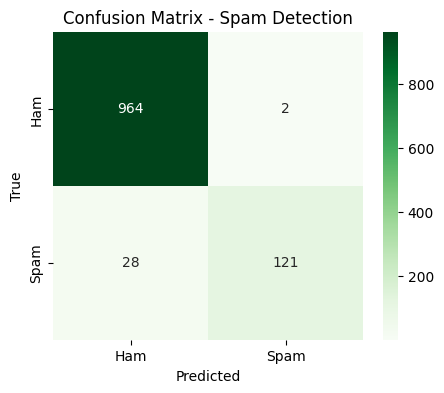

In [22]:
# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Confusion Matrix - Spam Detection")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [24]:
# 1Text Preprocessing
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

def clean_message(msg):
    msg = msg.lower()  # Lowercase
    words = msg.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    msg = " ".join(words)
    msg = "".join([char for char in msg if char not in punctuations])  # Remove punctuation
    return msg

df['cleaned_message'] = df['message'].apply(clean_message)
print(df.head())

  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4             nah think goes usf lives around though  


In [25]:
#Naive Bayes Accuracy
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9730941704035875
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.98      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115




--- Naive Bayes ---
Accuracy: 0.9730941704035875
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.98      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



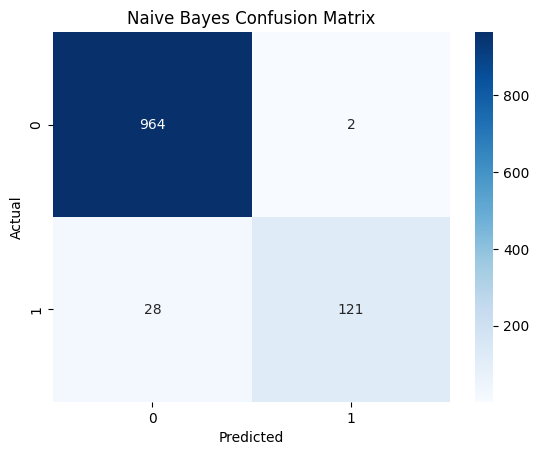

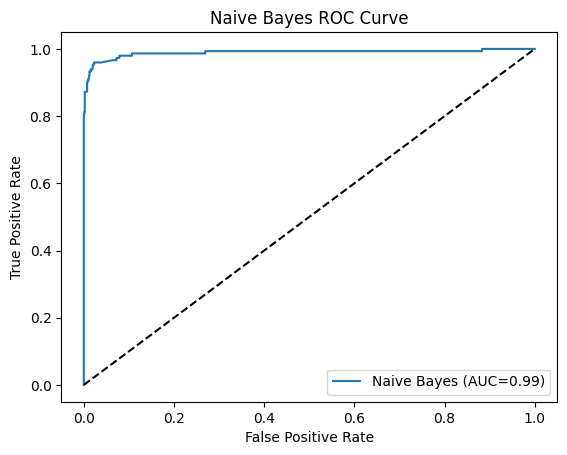


--- Logistic Regression ---
Accuracy: 0.9721973094170404
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



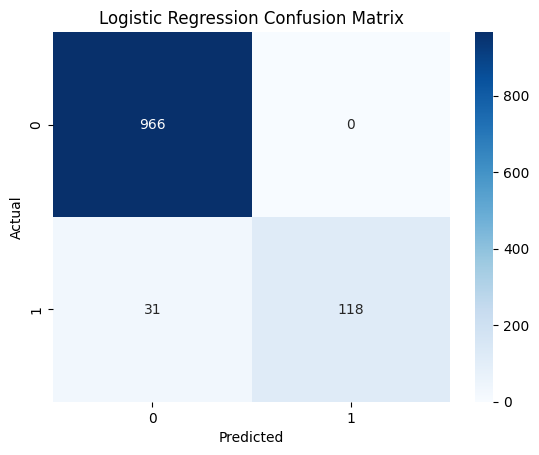

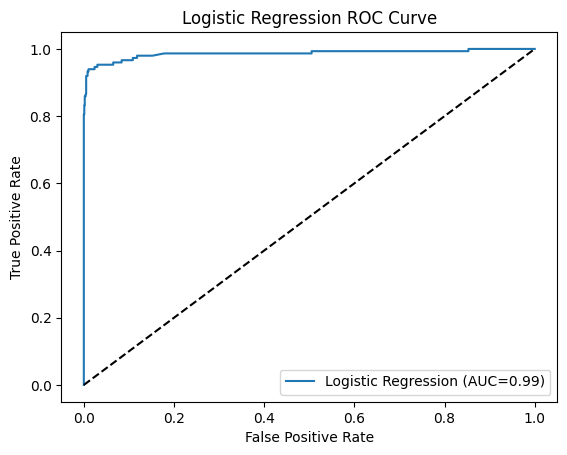


--- Support Vector Machine ---
Accuracy: 0.9820627802690582
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



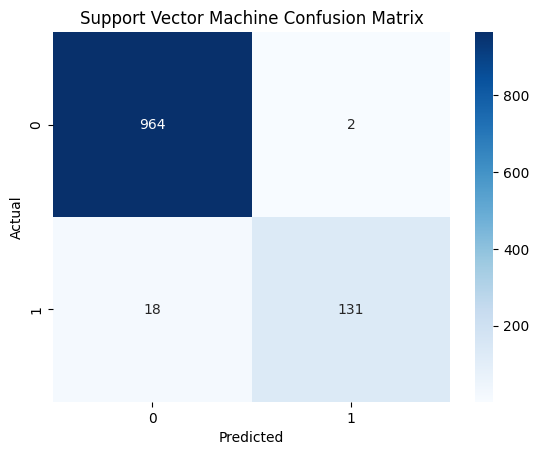

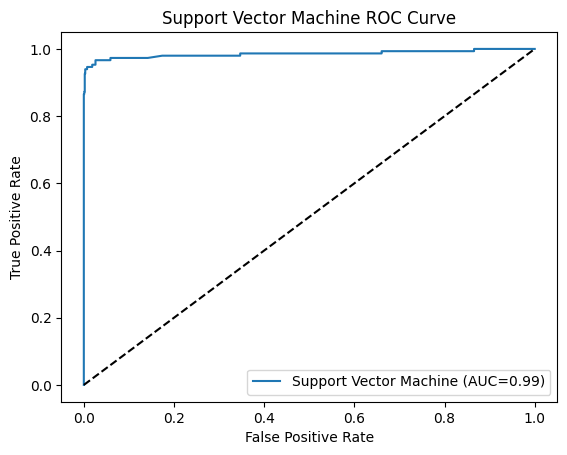

In [38]:
# Model Training & Evaluation
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear', probability=True)
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_tfidf)[:,1]
        # Use numerical labels for roc_curve and roc_auc_score
        y_test_numeric = y_test.map({'ham': 0, 'spam': 1})
        fpr, tpr, _ = roc_curve(y_test_numeric, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test_numeric, y_prob):.2f})')
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} ROC Curve')
        plt.legend()
        plt.show()

In [39]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [40]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9847533632286996
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.90      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [41]:
# --- 8. Predict New Messages ---
def predict_message(msg):
    msg_clean = preprocess_text(msg)
    msg_tfidf = tfidf.transform([msg_clean])
    pred = best_model.predict(msg_tfidf)[0]
    return 'Spam' if pred==1 else 'Ham'

In [49]:
# Step Predict a custom message
sample_msg = ["Congratulations! You have won a $1000 Walmart gift card. Click here to claim now!"]
pred = model.predict(vectorizer.transform(sample_msg))[0]
print("\n📨 Sample Message Prediction:", "SPAM 🚫" if pred==1 else "HAM ✅")


📨 Sample Message Prediction: HAM ✅
